In [ ]:
pip install prince

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
import prince

import pandas as pd
import nltk
import numpy as np
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from itertools import product
import matplotlib.pyplot as plt
import statistics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting algo
from sklearn.ensemble import AdaBoostClassifier # adaboost classifie

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
embeddings_df = pd.read_csv('/content/drive/MyDrive/BERT + STOCK /title_embeddings.csv')

In [ ]:
fin_data = pd.read_csv('/content/drive/MyDrive/BERT + STOCK /Label_data_march_02 (1).csv')

In [ ]:
fin_data.shape

(50416, 7)

In [ ]:
fin_data.Label.unique()

array(['Hold', 'Bullish', 'Bearish'], dtype=object)

In [ ]:
fin_data.head()

,date,title,close,high,low,open,Label
0,2020-10-08,"Microsoft Is Bringing Xbox Game Pass to iOS, b...",114.97,116.4,114.5901,116.25,Hold
1,2020-10-08,"US STOCKS-S&P 500, Dow track second straight w...",114.97,116.4,114.5901,116.25,Hold
2,2020-10-08,"RPT-U.S. explores restrictions on Ant Group, T...",114.97,116.4,114.5901,116.25,Hold
3,2020-10-09,Microsoft Takes Shots at Apple in New App Stor...,116.97,117.0,114.9200,115.28,Hold
4,2020-10-09,"Pre-Market Most Active for Oct 9, 2020 : MVIS...",116.97,117.0,114.9200,115.28,Hold


In [ ]:
fin_data = fin_data[['date', 'title', 'close', 'high', 'low', 'open','Label']]

In [ ]:
fin_data.head()

,date,title,close,high,low,open,Label
0,2020-10-08,"Microsoft Is Bringing Xbox Game Pass to iOS, b...",114.97,116.4,114.5901,116.25,Hold
1,2020-10-08,"US STOCKS-S&P 500, Dow track second straight w...",114.97,116.4,114.5901,116.25,Hold
2,2020-10-08,"RPT-U.S. explores restrictions on Ant Group, T...",114.97,116.4,114.5901,116.25,Hold
3,2020-10-09,Microsoft Takes Shots at Apple in New App Stor...,116.97,117.0,114.9200,115.28,Hold
4,2020-10-09,"Pre-Market Most Active for Oct 9, 2020 : MVIS...",116.97,117.0,114.9200,115.28,Hold


In [ ]:
merged = pd.concat([fin_data, embeddings_df], axis=1)

In [ ]:
merged.shape

(50416, 775)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/apple_training_data.csv')

In [ ]:
df.head()

,Label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,Hold,0.037546,-0.051923,0.344174,0.043786,-0.123420,-1.090308,-1.268697,0.672538,0.261593,-0.239256,0.420332,1.389317,0.894054,0.116467,0.473175,0.059027,0.248561,-0.619632,0.750312,-0.677750,-0.648951,-1.062019,0.045358,-0.412662,0.160938,-0.308168,-0.249423,-0.734509,-0.811776,0.283796,-0.570970,0.674950,-1.048993,-0.043500,-0.027299,1.132384,1.370240,0.579172,-0.065549,...,-0.301647,-0.565768,1.215243,-0.266465,0.064002,0.508505,-0.251068,0.482107,-0.099638,-0.738906,-0.377724,-0.545664,-0.245191,-0.336827,-0.532866,-1.175896,0.119630,0.475462,-0.195247,-0.035003,0.125132,-0.148954,0.543559,-1.735318,0.275952,0.562077,-0.455644,0.982017,-0.320485,0.530403,-0.196557,-0.799603,-0.627972,-2.115531,0.386281,-0.319896,-0.325062,0.461889,-0.209296,-0.394507
1,Hold,-0.093125,1.055027,-0.438218,-0.322597,0.738876,-0.002521,0.046680,0.686471,-0.388073,0.309424,0.174271,-0.162449,0.315963,0.448883,-0.393337,-0.002808,-0.295760,0.517465,-0.033798,-0.506839,-0.124960,-1.150620,0.446355,0.762440,1.170262,0.480147,-0.559297,-0.357340,-1.020051,0.047867,-0.734048,0.584359,-0.519498,-0.336999,-0.375883,0.490111,-1.139295,-0.970945,-0.585479,...,-0.945933,0.086706,-0.556696,-0.917997,1.075052,0.546898,0.858346,0.005431,0.477956,-0.008171,-0.506317,-1.336613,-0.527256,0.504620,-0.184575,-0.347946,0.198779,0.450703,-0.745462,-0.200957,-0.612498,-0.027740,-0.026578,-1.644605,1.078867,0.613731,-0.465032,0.498639,0.184688,-1.173489,-0.217742,-0.558083,-0.721577,0.796633,-0.243973,-0.892326,0.447980,-0.589984,-0.002229,-0.010382
2,Hold,-0.384540,0.279699,0.106182,-0.029910,1.073270,0.003156,-0.488824,0.405630,0.266080,0.095256,0.031279,1.155654,0.525354,0.520180,-0.271163,-0.181344,-1.008768,-0.465025,0.200859,-1.082525,-0.305292,0.215763,-0.541884,0.644441,0.576162,0.175921,0.025240,-1.351370,0.015212,0.270119,-0.187819,0.645505,0.362607,-0.428932,0.069556,0.123886,0.347831,-0.720449,-0.959762,...,-0.815400,-0.120942,0.377571,0.218196,0.039915,1.465137,0.989916,-0.214278,-0.633975,0.554659,-0.785857,-1.371425,-0.918851,0.325933,0.632197,0.065679,0.102457,0.784508,0.155211,0.033452,-0.441959,0.014169,0.201251,-0.842049,0.564756,0.299082,-0.077638,-0.010976,-0.709649,0.938359,0.438167,0.223044,-0.222422,-0.087880,0.014681,0.221565,0.051895,-0.107228,-0.128941,0.116207
3,Hold,-0.302616,0.148849,0.375761,-0.732169,0.438602,0.441591,0.465630,0.572733,-0.448347,0.244912,0.040643,0.643020,0.606962,-0.408092,-0.533262,-0.367083,0.232400,0.468287,0.213556,0.044146,-0.312535,-0.533911,0.034080,-0.448310,0.606111,-0.210637,-0.088499,-0.189560,-0.249609,0.188828,-0.342214,1.184108,-0.638950,-0.164663,-0.425913,0.610394,-0.163890,-0.715222,-0.273624,...,-0.417620,-0.567867,-0.351906,-0.609639,0.524588,0.825439,0.024019,0.418102,0.524916,-0.679347,-0.718317,-0.130137,0.238017,0.488869,-0.414903,-1.911417,0.223173,-0.159860,-0.460968,-0.092186,-0.358261,-0.432545,1.493156,-0.993699,0.522892,0.220661,0.028602,0.612950,0.358666,-0.704700,-0.156816,-0.337897,-0.468175,-0.484796,0.259535,0.017272,-0.173896,-0.084122,-0.465471,-0.381477
4,Hold,0.311217,-0.353453,0.523998,0.608913,0.279207,-0.954849,0.077359,0.379780,0.979836,-0.483236,-0.135463,1.569037,0.600532,0.978939,0.090648,0.269640,-0.092935,0.453170,-0.437131,-0.413042,-0.650756,-0.544429,0.814852,0.468384,0.575025,0.408669,-0.341693,0.625056,-0.369106,0.245226,-0.537825,0.472730,-0.262803,-0.480983,-0.556810,0.795559,0.223647,-0.371991,0.381469,...,-0.558782,-0.522723,0.122187,-0.587809,0.318140,1.227732,0.431692,0.074814,0.309206,-0.371420,-1.315941,0.007644,-0.797448,-0.058738,-0.448677,-0.351645,-0.393221,0.309311,-0.352860,-0.140008,-0.356492,-0.231851,0.479473,-1.532238,0.381690,0.677481,-0.028643,0.716926,-0.411166,-0.065203,

In [ ]:
df.shape

(42813, 769)

In [ ]:
X = df.iloc[:, 1:768] 

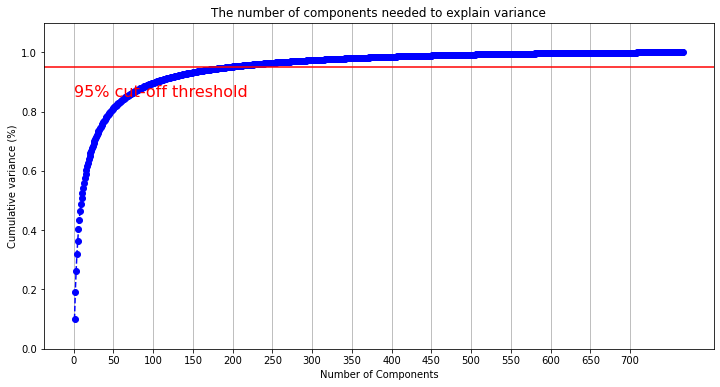

In [ ]:
pca = PCA().fit(X)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 768, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 750, step=50)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
Y = df[['Label']] #dependent variable

In [ ]:
sm = SMOTE()
X, Y = sm.fit_sample(X, Y)

In [ ]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [ ]:
Result = pd.concat([X,Y],axis=1)

In [ ]:
pca = prince.PCA(
    n_components=200,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42)

In [ ]:
pca = pca.fit(X)

In [ ]:
pca_result = pca.transform(X)

In [ ]:
pca_result.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,12.700699,-8.299932,6.558541,17.225399,2.617590,6.089747,-1.069989,6.153290,-3.451504,-4.567675,-0.641041,3.122355,-4.444408,0.417771,2.937430,0.496325,4.047787,-6.236918,-2.211636,1.603723,1.594950,2.364862,-1.436210,-1.324844,-0.032512,-1.952071,3.882496,3.573540,2.345871,-1.206594,1.746366,2.446839,-0.300028,-3.143634,1.150723,1.830132,-0.889488,1.025174,-0.492093,-2.697144,...,0.202914,0.123997,0.163147,-0.480430,-0.820355,-0.261108,-0.156496,-0.593943,-0.544872,0.966506,-0.032903,-0.190533,-0.569823,-0.589293,-0.253224,-0.608259,0.298133,-0.229476,-0.489679,0.420181,0.151244,0.057697,-0.431654,-0.149882,-0.166682,0.713202,1.009072,-0.479161,0.208738,0.535228,-0.007463,-0.434316,-0.151852,1.292040,-0.758117,0.772478,0.498169,-0.187430,0.788442,-0.263061
1,-2.158684,1.851527,-9.460374,-7.499850,-7.869803,4.235964,-1.320477,-1.451778,-1.798413,9.188946,0.621427,0.818005,1.865170,0.144022,2.786874,0.854923,-5.495115,1.003885,2.643317,1.213968,-0.027097,0.831716,3.934653,1.278019,7.646634,0.605585,-1.733371,3.075658,-0.894962,0.656056,2.619279,-1.339799,-2.995423,-0.705933,1.488425,-2.486243,0.060293,-2.224922,0.663750,0.368017,...,1.413317,-0.777817,0.176276,0.479655,0.315247,0.626059,-0.965004,-0.505149,0.348791,0.107880,-0.056914,-0.674916,-0.272391,0.189684,0.526639,0.642777,0.985227,1.290432,0.162069,-0.389516,0.302937,-0.290781,-0.658492,-0.819479,1.134735,-0.218641,0.241894,-0.255580,-0.768480,-0.697873,0.228334,-0.352090,0.432015,-0.371034,0.005297,0.062790,0.365472,0.297483,0.425199,0.102069
2,11.071089,0.221805,13.224041,-2.953081,-10.490442,-7.344750,-4.254249,2.962356,6.035651,4.224363,-0.064840,-4.583609,-0.210560,-1.742691,-4.504027,-1.824371,1.736423,-0.280585,-0.508200,-2.694558,-1.150282,0.178123,2.849542,-2.118143,2.358878,1.415255,-0.316611,-4.039049,-1.838827,-2.608750,-0.063564,-1.966190,-2.454464,0.131726,3.324168,-1.592318,-0.986852,-0.102308,-2.074929,5.760116,...,0.425498,-0.019514,-0.359844,-0.062414,0.724456,0.715110,-0.719960,-0.268870,1.471457,0.220661,1.427179,0.250413,0.256336,0.237007,-1.021833,-0.584025,1.017911,0.363634,-0.587504,-0.833844,1.200305,0.347355,-0.291190,0.235435,0.239445,-0.738509,0.240442,0.580533,-0.078808,0.285774,-0.085894,0.405525,-0.197349,-0.523136,-0.476313,-0.449337,-0.254493,0.579220,-0.375671,0.473883
3,-12.372115,-2.437640,-1.443254,8.683937,2.866667,-2.294348,-3.939452,-9.951083,4.773922,-3.761780,0.534116,-0.799225,0.261206,2.264291,-4.512898,2.149856,4.434140,-0.522778,2.140820,4.758262,0.634980,1.349484,-1.497353,-0.561645,2.567172,-0.309783,1.078642,0.024205,3.366644,1.433821,-0.209207,0.582896,-1.489728,1.707101,-1.478057,2.159803,-2.611288,0.087503,-1.226977,-0.844349,...,0.576795,0.262232,-0.426399,0.434378,-0.166398,0.652389,0.140516,-1.081979,-0.118532,0.395930,-0.197488,-0.126618,-0.055197,-0.275222,-0.584999,-0.197778,0.018790,-0.526184,0.567367,-0.871824,0.693571,-0.027300,0.031355,0.018616,0.409064,-0.329405,-0.375802,-0.319001,0.068506,-0.370460,0.249449,-0.254244,0.024504,-0.822276,-0.142006,-0.333292,0.741228,0.074993,-0.468714,0.041962
4,2.827015,-10.785181,2.608567,-0.047342,-0.815054,12.288722,-3.898094,-2.562877,1.353505,-7.151824,7.013355,-2.903310,-1.661344,-0.043495,-9.835423,3.321440,-3.776740,-5.286874,2.486899,-0.168997,-3.209220,0.600681,0.872221,-0.669533,0.139525,2.407059,1.045532,-5.043071,-3.996605,4.788004,-0.324623,-0.919464,2.918615,-1.013615,-1.807746,-4.685468,1.773679,-0.502465,-1.703052,-0.085503,...,0.114562,0.056780,0.025437,-0.067538,0.373623,0.527842,-0.168078,-0.075125,-0.073729,1.347858,-0.195141,0.601979,0.489727,0.032282,-0.549745,-0.634523,0.095906,0.672543,-0.003679,-0.317745,0.358905,0.079565,-0.204482,0.063764,0.022546,0.017794,-0.485069,-1.49556

In [ ]:
#pca_result.to_csv('/content/drive/MyDrive/BERT + STOCK /Balanced Data - PCA 200.csv')

In [ ]:
Y.rename(columns={0:'Label'}, inplace=True)

In [ ]:
balanced_data = pd.concat([pca_result,Y], axis=1)

In [ ]:
Y["Label"] = Y["Label"].astype('category')
Y.dtypes

Label    category
dtype: object

In [ ]:
Y["Label"] = Y["Label"].cat.codes

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(pca_result)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_scaled = scaler.transform(pca_result)

In [ ]:
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=42,shuffle=True)

In [ ]:
pca_result.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,12.700699,-8.299932,6.558541,17.225399,2.617590,6.089747,-1.069989,6.153290,-3.451504,-4.567675,-0.641041,3.122355,-4.444408,0.417771,2.937430,0.496325,4.047787,-6.236918,-2.211636,1.603723,1.594950,2.364862,-1.436210,-1.324844,-0.032512,-1.952071,3.882496,3.573540,2.345871,-1.206594,1.746366,2.446839,-0.300028,-3.143634,1.150723,1.830132,-0.889488,1.025174,-0.492093,-2.697144,...,0.202914,0.123997,0.163147,-0.480430,-0.820355,-0.261108,-0.156496,-0.593943,-0.544872,0.966506,-0.032903,-0.190533,-0.569823,-0.589293,-0.253224,-0.608259,0.298133,-0.229476,-0.489679,0.420181,0.151244,0.057697,-0.431654,-0.149882,-0.166682,0.713202,1.009072,-0.479161,0.208738,0.535228,-0.007463,-0.434316,-0.151852,1.292040,-0.758117,0.772478,0.498169,-0.187430,0.788442,-0.263061
1,-2.158684,1.851527,-9.460374,-7.499850,-7.869803,4.235964,-1.320477,-1.451778,-1.798413,9.188946,0.621427,0.818005,1.865170,0.144022,2.786874,0.854923,-5.495115,1.003885,2.643317,1.213968,-0.027097,0.831716,3.934653,1.278019,7.646634,0.605585,-1.733371,3.075658,-0.894962,0.656056,2.619279,-1.339799,-2.995423,-0.705933,1.488425,-2.486243,0.060293,-2.224922,0.663750,0.368017,...,1.413317,-0.777817,0.176276,0.479655,0.315247,0.626059,-0.965004,-0.505149,0.348791,0.107880,-0.056914,-0.674916,-0.272391,0.189684,0.526639,0.642777,0.985227,1.290432,0.162069,-0.389516,0.302937,-0.290781,-0.658492,-0.819479,1.134735,-0.218641,0.241894,-0.255580,-0.768480,-0.697873,0.228334,-0.352090,0.432015,-0.371034,0.005297,0.062790,0.365472,0.297483,0.425199,0.102069
2,11.071089,0.221805,13.224041,-2.953081,-10.490442,-7.344750,-4.254249,2.962356,6.035651,4.224363,-0.064840,-4.583609,-0.210560,-1.742691,-4.504027,-1.824371,1.736423,-0.280585,-0.508200,-2.694558,-1.150282,0.178123,2.849542,-2.118143,2.358878,1.415255,-0.316611,-4.039049,-1.838827,-2.608750,-0.063564,-1.966190,-2.454464,0.131726,3.324168,-1.592318,-0.986852,-0.102308,-2.074929,5.760116,...,0.425498,-0.019514,-0.359844,-0.062414,0.724456,0.715110,-0.719960,-0.268870,1.471457,0.220661,1.427179,0.250413,0.256336,0.237007,-1.021833,-0.584025,1.017911,0.363634,-0.587504,-0.833844,1.200305,0.347355,-0.291190,0.235435,0.239445,-0.738509,0.240442,0.580533,-0.078808,0.285774,-0.085894,0.405525,-0.197349,-0.523136,-0.476313,-0.449337,-0.254493,0.579220,-0.375671,0.473883
3,-12.372115,-2.437640,-1.443254,8.683937,2.866667,-2.294348,-3.939452,-9.951083,4.773922,-3.761780,0.534116,-0.799225,0.261206,2.264291,-4.512898,2.149856,4.434140,-0.522778,2.140820,4.758262,0.634980,1.349484,-1.497353,-0.561645,2.567172,-0.309783,1.078642,0.024205,3.366644,1.433821,-0.209207,0.582896,-1.489728,1.707101,-1.478057,2.159803,-2.611288,0.087503,-1.226977,-0.844349,...,0.576795,0.262232,-0.426399,0.434378,-0.166398,0.652389,0.140516,-1.081979,-0.118532,0.395930,-0.197488,-0.126618,-0.055197,-0.275222,-0.584999,-0.197778,0.018790,-0.526184,0.567367,-0.871824,0.693571,-0.027300,0.031355,0.018616,0.409064,-0.329405,-0.375802,-0.319001,0.068506,-0.370460,0.249449,-0.254244,0.024504,-0.822276,-0.142006,-0.333292,0.741228,0.074993,-0.468714,0.041962
4,2.827015,-10.785181,2.608567,-0.047342,-0.815054,12.288722,-3.898094,-2.562877,1.353505,-7.151824,7.013355,-2.903310,-1.661344,-0.043495,-9.835423,3.321440,-3.776740,-5.286874,2.486899,-0.168997,-3.209220,0.600681,0.872221,-0.669533,0.139525,2.407059,1.045532,-5.043071,-3.996605,4.788004,-0.324623,-0.919464,2.918615,-1.013615,-1.807746,-4.685468,1.773679,-0.502465,-1.703052,-0.085503,...,0.114562,0.056780,0.025437,-0.067538,0.373623,0.527842,-0.168078,-0.075125,-0.073729,1.347858,-0.195141,0.601979,0.489727,0.032282,-0.549745,-0.634523,0.095906,0.672543,-0.003679,-0.317745,0.358905,0.079565,-0.204482,0.063764,0.022546,0.017794,-0.485069,-1.49556

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
53032,0.265250,0.452413,0.506515,0.247752,0.437040,0.667797,0.308573,0.386297,0.580953,0.529398,0.441002,0.463760,0.387415,0.384107,0.357585,0.549781,0.568225,0.609441,0.472051,0.381484,0.371350,0.728327,0.328479,0.515125,0.423560,0.426272,0.623253,0.368044,0.592026,0.528846,0.458809,0.413037,0.502787,0.536755,0.392158,0.345619,0.497285,0.324668,0.545308,0.478278,...,0.447193,0.448621,0.506694,0.454508,0.625305,0.466767,0.537564,0.375874,0.455058,0.490999,0.415048,0.407827,0.408627,0.464719,0.576258,0.480772,0.407573,0.427758,0.485733,0.488008,0.458634,0.568877,0.464195,0.544534,0.365437,0.549489,0.341876,0.474177,0.505838,0.315185,0.570349,0.394297,0.519186,0.403904,0.498212,0.574520,0.484430,0.525188,0.502132,0.434729
103777,0.527883,0.309239,0.683379,0.178425,0.440153,0.307709,0.347402,0.600737,0.417914,0.349684,0.321785,0.531979,0.624186,0.368915,0.634003,0.556109,0.558545,0.518952,0.403960,0.396819,0.364760,0.676907,0.685818,0.690572,0.509173,0.525310,0.323403,0.533995,0.455737,0.582377,0.328311,0.709462,0.453018,0.468204,0.567621,0.467874,0.405071,0.582057,0.594016,0.401637,...,0.495832,0.352025,0.480867,0.505033,0.627198,0.295467,0.342243,0.456224,0.404117,0.612571,0.490503,0.586602,0.757448,0.561995,0.578459,0.590630,0.690252,0.448668,0.506996,0.485636,0.245893,0.604970,0.253019,0.600732,0.492193,0.638138,0.386316,0.477193,0.565459,0.366887,0.474382,0.344164,0.544211,0.503846,0.565422,0.410185,0.475016,0.406889,0.460910,0.506161
93480,0.745032,0.230731,0.378909,0.694667,0.284413,0.614541,0.396604,0.364991,0.446703,0.461701,0.388680,0.393004,0.449561,0.604696,0.373478,0.424800,0.465199,0.427342,0.320420,0.431498,0.581815,0.416632,0.350087,0.549052,0.577194,0.464202,0.589057,0.458569,0.441014,0.458100,0.419587,0.418288,0.505176,0.454045,0.507588,0.428591,0.633479,0.567558,0.437403,0.506312,...,0.543967,0.536569,0.521602,0.461931,0.513260,0.294707,0.439343,0.428593,0.409871,0.472767,0.477995,0.548314,0.358082,0.445212,0.404650,0.395949,0.534047,0.429247,0.495555,0.532092,0.511256,0.560836,0.354756,0.538538,0.436488,0.397807,0.467128,0.475108,0.558045,0.435218,0.545864,0.475397,0.364380,0.501192,0.500615,0.390426,0.373361,0.406239,0.477701,0.466176
36090,0.351416,0.398533,0.442142,0.690568,0.184369,0.298014,0.415673,0.121423,0.535906,0.426396,0.561682,0.583194,0.290226,0.520105,0.488883,0.469922,0.485970,0.501893,0.403154,0.521073,0.427183,0.406537,0.429126,0.537421,0.583453,0.417209,0.469267,0.479623,0.438354,0.641176,0.431024,0.414878,0.428524,0.388172,0.352017,0.454651,0.510446,0.527736,0.471925,0.420008,...,0.651573,0.561193,0.575917,0.586932,0.516408,0.556890,0.509615,0.458479,0.302740,0.471902,0.524216,0.455466,0.395405,0.556850,0.514479,0.574461,0.417776,0.570966,0.594238,0.415074,0.538257,0.399470,0.413607,0.467161,0.546672,0.519561,0.318174,0.425171,0.519279,0.458171,0.535411,0.416212,0.444944,0.458182,0.381142,0.340932,0.456118,0.506015,0.539696,0.528282
51343,0.325416,0.427388,0.400724,0.504987,0.328114,0.311179,0.499860,0.451637,0.461253,0.587438,0.428425,0.460136,0.424134,0.251986,0.487621,0.461136,0.191300,0.328360,0.533249,0.417310,0.333733,0.463261,0.366562,0.419060,0.569472,0.277808,0.357063,0.420686,0.335941,0.498247,0.615899,0.505014,0.534454,0.452973,0.397174,0.457927,0.542818,0.443587,0.466924,0.476299,...,0.454045,0.651454,0.434583,0.381887,0.430555,0.458940,0.382573,0.472431,0.503115,0.401045,0.513281,0.319553,0.454184,0.462265,0.518481,0.451960,0.502049,0.524382,0.526280,0.483462,0.407611,0.536615,0.346263,0.456003,0.434085,0.452531,0.455869,0.518795,0.599121,0.508966,0.421911,0.442800,0.490921,0.301930,0.495337,0.480007,0.390370,0.489753,0.528702,0.474643


In [ ]:
X_train.shape

(85442, 200)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
x_train = np.array(X_train)
x_train = np.reshape(x_train, (x_train.shape[0],1, x_train.shape[1]))

In [ ]:
x_test = np.array(X_test)
x_test = np.reshape(x_test, (x_test.shape[0],1, x_test.shape[1]))

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(1028, input_shape=(x_train.shape[1],200),return_sequences=True, recurrent_activation='relu'))
model_LSTM.add(Dense(800,activation='relu'))
#model.add(LSTM(904,return_sequences=False,recurrent_activation='relu'))
model_LSTM.add(Dense(3, activation='softmax'))
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 1028)           5053648   
_________________________________________________________________
dense (Dense)                (None, 1, 800)            823200    
_________________________________________________________________
dense_1 (Dense)              (None, 1, 3)              2403      
Total params: 5,879,251
Trainable params: 5,879,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import keras
loss_fn = keras.losses.SparseCategoricalCrossentropy()
opt = keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True)
model_LSTM.compile(loss= loss_fn, optimizer=opt, metrics = ['accuracy'])

In [ ]:
model_LSTM.fit(x_train,y_train, batch_size=128, epochs=50)

Epoch 1/50
668/668 [==============================] - 9s 8ms/step - loss: 1.0958 - accuracy: 0.3541
Epoch 2/50
668/668 [==============================] - 5s 7ms/step - loss: 1.0587 - accuracy: 0.4352
Epoch 3/50
668/668 [==============================] - 5s 7ms/step - loss: 1.0240 - accuracy: 0.4763
Epoch 4/50
668/668 [==============================] - 5s 7ms/step - loss: 0.9971 - accuracy: 0.4986
Epoch 5/50
668/668 [==============================] - 5s 7ms/step - loss: 0.9704 - accuracy: 0.5200
Epoch 6/50
668/668 [==============================] - 5s 7ms/step - loss: 0.9411 - accuracy: 0.5400
Epoch 7/50
668/668 [==============================] - 5s 7ms/step - loss: 0.9098 - accuracy: 0.5639
Epoch 8/50
668/668 [==============================] - 5s 7ms/step - loss: 0.8832 - accuracy: 0.5846
Epoch 9/50
668/668 [==============================] - 5s 8ms/step - loss: 0.8582 - accuracy: 0.6054
Epoch 10/50
668/668 [==============================] - 5s 7ms/step - loss: 0.8413 - accuracy: 0.6129

In [ ]:
pred_lstm = model_LSTM.predict_classes(x_test)

In [ ]:
print('Accuracy score of the model:')
print(accuracy_score(y_test, pred_lstm))
print("Confusion matrix of the model:")
print(confusion_matrix(y_test, pred_lstm))
print("Classification report the model:")
print(classification_report(y_test, pred_lstm))

Accuracy score of the model:
0.8648939656383128
Confusion matrix of the model:
[[6441  191  496]
 [ 183 6240  618]
 [ 633  765 5794]]
Classification report the model:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7128
           1       0.87      0.89      0.88      7041
           2       0.84      0.81      0.82      7192

    accuracy                           0.86     21361
   macro avg       0.86      0.87      0.86     21361
weighted avg       0.86      0.86      0.86     21361



In [ ]:
lstm_model = '/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/lstm.sav'

In [ ]:
pickle.dump(lstm_model, open(lstm_model, 'wb'))

In [ ]:
lstm_model_json = model_LSTM.to_json()
with open("/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/model_LSTM.json", "w") as json_file:
    json_file.write(lstm_model_json)
# serialize weights to HDF5
model_LSTM.save_weights("/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/model_LSTM.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model_mlp = Sequential()
#model.add(LSTM(1028, input_shape=(x_train.shape[1],250),return_sequences=True, recurrent_activation='relu'))
#model.add(LSTM(904,return_sequences=False,recurrent_activation='relu'))
model_mlp.add(Dense(1028, input_shape=(x_train.shape[1],200), activation='relu'))
model_mlp.add(Dropout(0.3))
model_mlp.add(Dense(800,activation='relu'))
model_mlp.add(Dropout(0.3))
model_mlp.add(Dense(400,activation='relu'))
model_mlp.add(Dropout(0.3))
model_mlp.add(Dense(200,activation='relu'))
model_mlp.add(Dropout(0.3))
model_mlp.add(Dense(3, activation='softmax'))

model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1, 1028)           206628    
_________________________________________________________________
dropout (Dropout)            (None, 1, 1028)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 1, 800)            823200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 800)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1, 400)            320400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 400)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1, 200)           

In [ ]:
import keras
loss_fn = keras.losses.SparseCategoricalCrossentropy()
opt = keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True)
import tensorflow as tf
metric = tf.keras.metrics.SparseTopKCategoricalAccuracy()
model_mlp.compile(loss= loss_fn, optimizer=opt, metrics = ['accuracy'])


In [ ]:
model_mlp.fit(x_train,y_train, batch_size=128, epochs=50)

Epoch 1/50
668/668 [==============================] - 4s 5ms/step - loss: 1.1035 - accuracy: 0.3429
Epoch 2/50
668/668 [==============================] - 3s 5ms/step - loss: 1.0818 - accuracy: 0.3933
Epoch 3/50
668/668 [==============================] - 3s 5ms/step - loss: 1.0391 - accuracy: 0.4504
Epoch 4/50
668/668 [==============================] - 3s 5ms/step - loss: 1.0046 - accuracy: 0.4854
Epoch 5/50
668/668 [==============================] - 3s 5ms/step - loss: 0.9795 - accuracy: 0.5086
Epoch 6/50
668/668 [==============================] - 3s 5ms/step - loss: 0.9536 - accuracy: 0.5267
Epoch 7/50
668/668 [==============================] - 3s 5ms/step - loss: 0.9346 - accuracy: 0.5424
Epoch 8/50
668/668 [==============================] - 3s 5ms/step - loss: 0.9146 - accuracy: 0.5602
Epoch 9/50
668/668 [==============================] - 3s 5ms/step - loss: 0.8946 - accuracy: 0.5740
Epoch 10/50
668/668 [==============================] - 3s 5ms/step - loss: 0.8697 - accuracy: 0.5933

In [ ]:
model_mlp.predict(x_test)

In [ ]:
pred_mlp = model_mlp.predict_classes(x_test)

In [ ]:
print('Accuracy score of the MLP model:')
print(accuracy_score(y_test, pred_mlp))
print("Confusion matrix of the MLP model:")
print(confusion_matrix(y_test, pred_mlp))
print("Classification report the MLP model:")
print(classification_report(y_test, pred_mlp))

Accuracy score of the MLP model:
0.8692945086840503
Confusion matrix of the MLP model:
[[7058   27   43]
 [ 138 6791  112]
 [1457 1015 4720]]
Classification report the MLP model:
              precision    recall  f1-score   support

           0       0.82      0.99      0.89      7128
           1       0.87      0.96      0.91      7041
           2       0.97      0.66      0.78      7192

    accuracy                           0.87     21361
   macro avg       0.88      0.87      0.86     21361
weighted avg       0.88      0.87      0.86     21361



In [ ]:
mlp_model = '/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/mlp.sav'

In [ ]:
pickle.dump(mlp_model, open(mlp_model, 'wb'))

In [ ]:
mlp_model_json = model_mlp.to_json()
with open("/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/model_MLP.json", "w") as json_file:
    json_file.write(mlp_model_json)
# serialize weights to HDF5
model_mlp.save_weights("/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/model_MLP.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
xg_model_basic = XGBClassifier(tree_method='gpu_hist' ).fit(X_train, y_train)
preds = xg_model_basic.predict(X_test)

In [ ]:
print('Accuracy score of the model:')
print(accuracy_score(y_test, preds))
print("Confusion matrix of the model:")
print(confusion_matrix(y_test, preds))
print("Classification report the model:")
print(classification_report(y_test, preds))

Accuracy score of the model:
0.5768456532933851
Confusion matrix of the model:
[[4060 1697 1371]
 [1636 4009 1396]
 [1375 1564 4253]]
Classification report the model:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      7128
           1       0.55      0.57      0.56      7041
           2       0.61      0.59      0.60      7192

    accuracy                           0.58     21361
   macro avg       0.58      0.58      0.58     21361
weighted avg       0.58      0.58      0.58     21361



In [ ]:
#param_grid = dict(max_depth=max_depth)
model = XGBClassifier(tree_method='gpu_hist')
param_grid = {
        'min_child_weight': [1, 5, 10],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.02]
        }
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_scaled, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 66.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 80.1min finished


Best: -0.848159 using {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 10, 'min_child_weight': 1}


In [ ]:
xg_model=XGBClassifier(colsample_bytree=1.0, learning_rate =0.05, max_depth= 10, min_child_weight=1,tree_method='gpu_hist' ).fit(X_train, y_train)
preds = xg_model.predict(X_test)

In [ ]:
print('Accuracy score of the model:')
print(accuracy_score(y_test, preds))
print("Confusion matrix of the model:")
print(confusion_matrix(y_test, preds))
print("Classification report the model:")
print(classification_report(y_test, preds))

Accuracy score of the model:
0.8875988951828098
Confusion matrix of the model:
[[6711  226  191]
 [ 291 6501  249]
 [ 721  723 5748]]
Classification report the model:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7128
           1       0.87      0.92      0.90      7041
           2       0.93      0.80      0.86      7192

    accuracy                           0.89     21361
   macro avg       0.89      0.89      0.89     21361
weighted avg       0.89      0.89      0.89     21361



In [ ]:
import pickle

In [ ]:
xgboost_model = '/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/xgboost.sav'

In [ ]:
pickle.dump(xg_model, open(xgboost_model, 'wb'))